LDA Classifier Performance:
Accuracy: 0.9815, Precision: 0.9825, Recall: 0.9841
Confusion Matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Logistic Regression Performance:
Accuracy: 0.9815, Precision: 0.9825, Recall: 0.9841
Confusion Matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


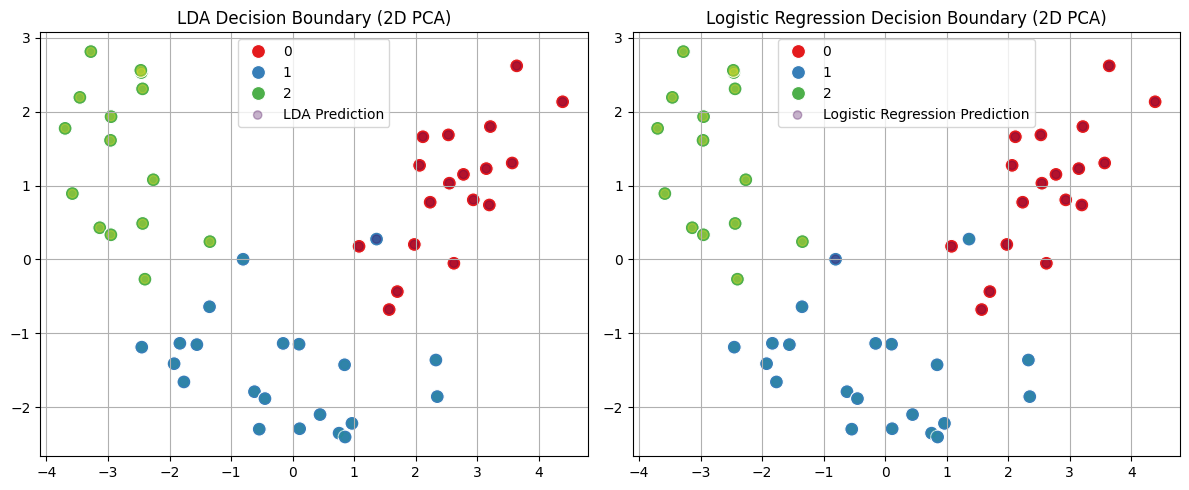

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# 1. Load the Wine dataset
wine = datasets.load_wine()
X = wine.data  # Features (13 features)
y = wine.target  # Target labels (3 classes)

# 2. Split the Data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train an LDA Model
lda_classifier = LDA()
lda_classifier.fit(X_train_scaled, y_train)

# 4. Evaluate the LDA Model
y_pred_lda = lda_classifier.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and confusion matrix
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='macro')
recall_lda = recall_score(y_test, y_pred_lda, average='macro')
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

print("LDA Classifier Performance:")
print(f"Accuracy: {accuracy_lda:.4f}, Precision: {precision_lda:.4f}, Recall: {recall_lda:.4f}")
print("Confusion Matrix:\n", conf_matrix_lda)

# 5. Compare with Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train_scaled, y_train)

y_pred_logreg = logreg_classifier.predict(X_test_scaled)

# Evaluate Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_logreg:.4f}, Precision: {precision_logreg:.4f}, Recall: {recall_logreg:.4f}")
print("Confusion Matrix:\n", conf_matrix_logreg)

# 6. Visualize Decision Boundaries (Optional)
# We will reduce the dataset to 2 dimensions using PCA for this visualization
from sklearn.decomposition import PCA

# Reduce dataset to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit LDA and Logistic Regression on 2D PCA data
lda_classifier_pca = LDA()
lda_classifier_pca.fit(X_train_pca, y_train)
logreg_classifier_pca = LogisticRegression(max_iter=1000)
logreg_classifier_pca.fit(X_train_pca, y_train)

# Plot decision boundaries for LDA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('LDA Decision Boundary (2D PCA)')
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='Set1', s=100)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_lda, alpha=0.3, label='LDA Prediction')
plt.legend()
plt.grid(True)

# Plot decision boundaries for Logistic Regression
plt.subplot(1, 2, 2)
plt.title('Logistic Regression Decision Boundary (2D PCA)')
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='Set1', s=100)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_logreg, alpha=0.3, label='Logistic Regression Prediction')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
